# Sentinel-1 data in Python

In [ ]:
import pystac_client
import stackstac # build an on-demand STAC data cube

## Querying S1-SLC data

Sentinel-1 data comes at different levels and provides different products. For applications such as measuring deformation due to tectonic or volcanic activity, quantifying ground subsidence or to generate digital elevation models (DEM), [interferometric SAR (InSAR)](https://en.wikipedia.org/wiki/Interferometric_synthetic-aperture_radar) techniques can be used. 

To apply such workflows with Sentinel data, we can use [Sentinel-1 Level 1 Single Look Complex](https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-1-sar/products-algorithms/level-1/single-look-complex/interferometric-wide-swath) products.

![](https://sentinels.copernicus.eu/documents/247904/1824983/Sentinel-1-core-fig-1.jpg)

So far, very few cloud computing capabilities are available to compute such complex workflows, therefore, there is still a need to download data. Depending on the application, we will need to download data with certain characteristics. For example, for DEM generation, we will require a pair of Sentinel-1 scenes acquired closely in time and that have a perpendicular baseline between 150 and 300 m. Usually, computing the perpendicular baseline between two images requires the download of the image pairs. 

To avoid downloading several unnecessary Sentinel-1 scenes, we can make use of the [Alaska Satellite Facility (ASF)](https://search.asf.alaska.edu/) geographic and baseline tools to query the data we need via their API.

Libraries needed for this exercise are imported below:

In [138]:
import asf_search as asf
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Define extent

We will define an aoi and a start and end date for our queries.

In [168]:
footprint = gpd.read_file("../../data/poznan.geojson").to_wkt()
date_start = "2022/05/01"
date_end = "2022/10/01"

### Geographical search

Now we can use the [`asf_search` Python module](https://docs.asf.alaska.edu/asf_search/basics/) to perform our geographical search. We specify here the platform and the processing level (SLC) that we are looking for, and we limit the results for this exercise to 10 scenes.

In [166]:
products = asf.geo_search(platform=[asf.PLATFORM.SENTINEL1],
                          intersectsWith=footprint.geometry[0],
                          processingLevel=[asf.PRODUCT_TYPE.SLC],
                          start=date_start,
                          end=date_end,
                          maxResults=10)

We can then add the results of the query to a pandas dataframe for easier inspection:

In [167]:
products_df = pd.DataFrame([p.properties for p in products])
products_df

,beamModeType,browse,bytes,centerLat,centerLon,faradayRotation,fileID,flightDirection,groupID,granuleType,...,processingDate,processingLevel,sceneName,sensor,startTime,stopTime,url,pgeVersion,fileName,frameNumber
0,IW,None,4657751122,52.2492,17.9661,None,S1A_IW_SLC__1SDV_20220929T163603_20220929T1636...,ASCENDING,S1A_IWDV_0167_0173_045222_175,SENTINEL_1A_FRAME,...,2022-09-29T16:36:03.000Z,SLC,S1A_IW_SLC__1SDV_20220929T163603_20220929T1636...,C-SAR,2022-09-29T16:36:03.000Z,2022-09-29T16:36:30.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,003.52,S1A_IW_SLC__1SDV_20220929T163603_20220929T1636...,167
1,IW,None,4580763215,52.6218,18.4544,None,S1A_IW_SLC__1SDV_20220926T050057_20220926T0501...,DESCENDING,S1A_IWDV_0416_0423_045171_124,SENTINEL_1A_FRAME,...,2022-09-26T05:00:57.000Z,SLC,S1A_IW_SLC__1SDV_20220926T050057_20220926T0501...,C-SAR,2022-09-26T05:00:57.000Z,2022-09-26T05:01:24.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,003.52,S1A_IW_SLC__1SDV_20220926T050057_20220926T0501...,417
2,IW,None,4609579705,53.0143,15.6840,None,S1A_IW_SLC__1SDV_20220922T164428_20220922T1644...,ASCENDING,S1A_IWDV_0169_0176_045120_073,SENTINEL_1A_FRAME,...,2022-09-22T16:44:28.000Z,SLC,S1A_IW_SLC__1SDV_20220922T164428_20220922T1644...,C-SAR,2022-09-22T16:44:28.000Z,2022-09-22T16:44:56.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,003.52,S1A_IW_SLC__1SDV_20220922T164428_20220922T1644...,170
3,IW,None,4646654586,51.5302,16.1188,None,S1A_IW_SLC__1SDV_20220922T164404_20220922T1644...,ASCENDING,S1A_IWDV_0165_0170_045120_073,SENTINEL_1A_FRAME,...,2022-09-22T16:44:04.000Z,SLC,S1A_IW_SLC__1SDV_20220922T164404_20220922T1644...,C-SAR,2022-09-22T16:44:04.000Z,2022-09-22T16:44:31.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,003.52,S1A_IW_SLC__1SDV_20220922T164404_20220922T1644...,165
4,IW,None,4686861613,53.0102,16.5167,None,S1A_IW_SLC__1SDV_20220919T050904_20220919T0509...,DESCENDING,S1A_IWDV_0415_0421_045069_022,SENTINEL_1A_FRAME,...,2022-09-19T05:09:04.000Z,SLC,S1A_IW_SLC__1SDV_20220919T050904_20220919T0509...,C-SAR,2022-09-19T05:09:04.000Z,2022-09-19T05:09:31.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,003.52,S1A_IW_SLC__1SDV_20220919T050904_20220919T0509...,415
5,IW,None,4652270299,52.2492,17.9662,None,S1A_IW_SLC__1SDV_20220917T163602_20220917T1636...,ASCENDING,S1A_IWDV_0167_0173_045047_175,SENTINEL_1A_FRAME,...,2022-09-17T16:36:02.000Z,SLC,S1A_IW_SLC__1SDV_20220917T163602_20220917T1636...,C-SAR,2022-09-17T16:36:02.000Z,2022-09-17T16:36:30.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,003.52,S1A_IW_SLC__1SDV_20220917T163602_20220917T1636...,167
6,IW,None,4734573721,52.6220,18.4523,None,S1A_IW_SLC__1SDV_20220914T050057_20220914T0501...,DESCENDING,S1A_IWDV_0416_0423_044996_124,SENTINEL_1A_FRAME,...,2022-09-14T05:00:57.000Z,SLC,S1A_IW_SLC__1SDV_20220914T050057_20220914T0501...,C-SAR,2022-09-14T05:00:57.000Z,2022-09-14T05:01:24.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,003.52,S1A_IW_SLC__1SDV_20220914T050057_20220914T0501...,417
7,IW,None,4707081403,53.0145,15.6814,None,S1A_IW_SLC__1SDV_20220910T164429_20220910T1644...,ASCENDING,S1A_IWDV_0169_0176_044945_073,SENTINEL_1A_FRAME,...,2022-09-10T16:44:29.000Z,SLC,S1A_IW_SLC__1SDV_20220910T164429_20220910T1644...,C-SAR,2022-09-10T16:44:29.000Z,2022-09-10T16:44:56.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,003.52,S1A_IW_SLC__1SDV_20220910T164429_20220910T1644...,170
8,IW,None,4721237800,51.5303,16.1161,None,S1A_IW_SLC__1SDV_20220910T164404_20220910T1644...,ASCENDING,S1A_IWDV_0164_0171_044945_073,SENTINEL_1A_FRAME,...,2022-09-10T16:44:04.000Z,SLC,S1A_IW_SLC__1SDV_20220910T164404_20220910T1644...,C-SAR,2022-09-10T16:44:04.000Z,2022-09-10T16:44:32.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,003.52,S1A_IW_SLC__1SDV_20220910T164404_20220910T1644...,165
9,IW,None,4575317676,53.0107,16.5132,None,S1A_IW_SLC__1SDV_20220907T050904_20220907T0509...,DESCENDING,S1A_IWDV_0415_0421_044894_022,SENTINEL_1A_FRAME,...,2022-09-07T05:09:04.000Z,SLC,

### Baseline search

Now that we have scenes that intersect with our defined extent, we can do a baseline search that will allow us to fetch all the S1 scenes that pair with the first S1 result from our geographical query. The baseline search returns a set of products with precomputed perpendicular baselines, so that we can focus our download on the data that we need. 

In [145]:
stack = products[0].stack()

In [148]:
print(f'{len(stack)} products found in stack')

445 products found in stack


We can take a look at the data again as a pandas data frame and we will see that the last two columns correspond to the temporal and perpendicular baseline. We also get information on the flight direction (Ascending or Descending pass). 

In [153]:
stack_df = pd.DataFrame([p.properties for p in stack])
stack_df

,beamModeType,browse,bytes,centerLat,centerLon,faradayRotation,fileID,flightDirection,groupID,granuleType,...,sceneName,sensor,startTime,stopTime,url,pgeVersion,fileName,frameNumber,temporalBaseline,perpendicularBaseline
0,IW,None,4619446112,52.5775,17.8534,None,S1A_IW_SLC__1SDV_20141029T163519_20141029T1635...,ASCENDING,S1A_IWDV_0168_0173_003047_175,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SDV_20141029T163519_20141029T1635...,C-SAR,2014-10-29T16:35:19.000Z,2014-10-29T16:35:46.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,002.71,S1A_IW_SLC__1SDV_20141029T163519_20141029T1635...,168,-2892,7.0
1,IW,None,4722951640,52.5774,17.8506,None,S1A_IW_SLC__1SDV_20141122T163518_20141122T1635...,ASCENDING,S1A_IWDV_0168_0173_003397_175,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SDV_20141122T163518_20141122T1635...,C-SAR,2014-11-22T16:35:18.000Z,2014-11-22T16:35:46.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,002.71,S1A_IW_SLC__1SDV_20141122T163518_20141122T1635...,168,-2868,69.0
2,IW,None,4522111160,52.5774,17.8509,None,S1A_IW_SLC__1SDV_20141204T163518_20141204T1635...,ASCENDING,S1A_IWDV_0168_0173_003572_175,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SDV_20141204T163518_20141204T1635...,C-SAR,2014-12-04T16:35:18.000Z,2014-12-04T16:35:45.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,002.71,S1A_IW_SLC__1SDV_20141204T163518_20141204T1635...,168,-2856,90.0
3,IW,None,4728062249,52.5777,17.8487,None,S1A_IW_SLC__1SDV_20141216T163518_20141216T1635...,ASCENDING,S1A_IWDV_0168_0173_003747_175,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SDV_20141216T163518_20141216T1635...,C-SAR,2014-12-16T16:35:18.000Z,2014-12-16T16:35:45.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,002.71,S1A_IW_SLC__1SDV_20141216T163518_20141216T1635...,168,-2844,-55.0
4,IW,None,4486483588,52.5775,17.8488,None,S1A_IW_SLC__1SDV_20141228T163517_20141228T1635...,ASCENDING,S1A_IWDV_0167_0174_003922_175,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SDV_20141228T163517_20141228T1635...,C-SAR,2014-12-28T16:35:17.000Z,2014-12-28T16:35:44.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,002.71,S1A_IW_SLC__1SDV_20141228T163517_20141228T1635...,168,-2832,-56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,IW,None,4672535887,52.2494,17.9683,None,S1A_IW_SLC__1SDV_20230620T163603_20230620T1636...,ASCENDING,S1A_IWDV_0167_0173_049072_175,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SDV_20230620T163603_20230620T1636...,C-SAR,2023-06-20T16:36:03.166Z,2023-06-20T16:36:30.250Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,003.61,S1A_IW_SLC__1SDV_20230620T163603_20230620T1636...,167,264,109.0
441,IW,None,4718179946,52.2499,17.9680,None,S1A_IW_SLC__1SDV_20230702T163603_20230702T1636...,ASCENDING,S1A_IWDV_0167_0173_049247_175,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SDV_20230702T163603_20230702T1636...,C-SAR,2023-07-02T16:36:03.964Z,2023-07-02T16:36:31.045Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,003.61,S1A_IW_SLC__1SDV_20230702T163603_20230702T1636...,167,276,88.0
442,IW,None,4626122112,52.2499,17.9659,None,S1A_IW_SLC__1SDV_20230714T163604_20230714T1636...,ASCENDING,S1A_IWDV_0167_0172_049422_175,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SDV_20230714T163604_20230714T1636...,C-SAR,2023-07-14T16:36:04.988Z,2023-07-14T16:36:32.070Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,003.61,S1A_IW_SLC__1SDV_20230714T163604_20230714T1636...,167,288,-40.0
443,IW,None,4675450333,52.2497,17.9655,None,S1A_IW_SLC__1SDV_20230726T163605_20230726T1636...,ASCENDING,S1A_IWDV_0167_0173_049597_175,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SDV_20230726T163605_20230726T1636...,C-SAR,2023-07-26T16:36:05.545Z,2023-07-26T16:36:32.627Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,003.61,S1A_IW_SLC__1SDV_20230726T163605_20230726T1636...,167,300,-62.0


To have an idea of how spread our data is, we can plot the temporal and the perpendicular baselines against each other.

<Axes: xlabel='temporalBaseline', ylabel='perpendicularBaseline'>

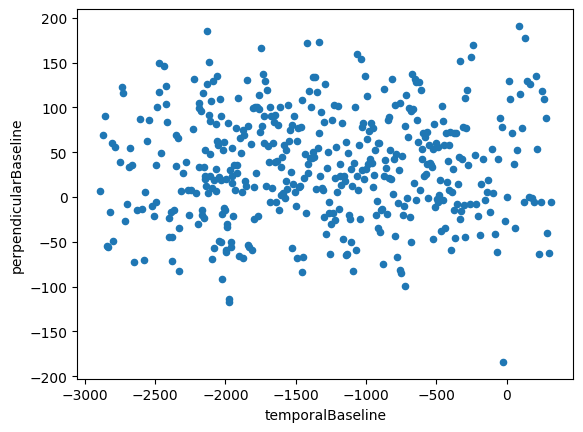

In [154]:
stack_df.plot.scatter(x="temporalBaseline", y="perpendicularBaseline")

Ideally, we will filter those values where `temporalBaseline <= 30` and `150 >= perpendicularBaseline <= 300` for instance to get image pairs suitable for DEM generation. So we can filter our data frame for those values. We look for absolute values since the order of the images is not relevant.

In [178]:
stack_df[(abs(stack_df['temporalBaseline']) <= 30) &
         (abs(stack_df['perpendicularBaseline']) >= 150) &
         (abs(stack_df['perpendicularBaseline']) <= 300)]

,beamModeType,browse,bytes,centerLat,centerLon,faradayRotation,fileID,flightDirection,groupID,granuleType,...,sceneName,sensor,startTime,stopTime,url,pgeVersion,fileName,frameNumber,temporalBaseline,perpendicularBaseline
416,IW,None,4563266039,52.2489,17.9638,None,S1A_IW_SLC__1SDV_20220905T163603_20220905T1636...,ASCENDING,S1A_IWDV_0167_0173_044872_175,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SDV_20220905T163603_20220905T1636...,C-SAR,2022-09-05T16:36:03.000Z,2022-09-05T16:36:30.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,003.52,S1A_IW_SLC__1SDV_20220905T163603_20220905T1636...,167,-24,-184.0


We only get one image fitting the characteristics we require. Let's look at its properties:

In [179]:
stack[416].properties

{'beamModeType': 'IW',
 'browse': None,
 'bytes': 4563266039,
 'centerLat': 52.2489,
 'centerLon': 17.9638,
 'faradayRotation': None,
 'fileID': 'S1A_IW_SLC__1SDV_20220905T163603_20220905T163630_044872_055BFF_5F88-SLC',
 'flightDirection': 'ASCENDING',
 'groupID': 'S1A_IWDV_0167_0173_044872_175',
 'granuleType': 'SENTINEL_1A_FRAME',
 'insarStackId': None,
 'md5sum': '72e8baa2456d336cb9b71e2c5f7e93be',
 'offNadirAngle': None,
 'orbit': 44872,
 'pathNumber': 175,
 'platform': 'Sentinel-1A',
 'pointingAngle': None,
 'polarization': 'VV+VH',
 'processingDate': '2022-09-05T16:36:03.000Z',
 'processingLevel': 'SLC',
 'sceneName': 'S1A_IW_SLC__1SDV_20220905T163603_20220905T163630_044872_055BFF_5F88',
 'sensor': 'C-SAR',
 'startTime': '2022-09-05T16:36:03.000Z',
 'stopTime': '2022-09-05T16:36:30.000Z',
 'url': 'https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20220905T163603_20220905T163630_044872_055BFF_5F88.zip',
 'pgeVersion': '003.52',
 'fileName': 'S1A_IW_SLC__1SDV_20220905T163603_

Let's also remember this is paired with the original product we calcualted the baselines for.

In [185]:
products[0].properties

{'beamModeType': 'IW',
 'browse': None,
 'bytes': 4657751122,
 'centerLat': 52.2492,
 'centerLon': 17.9661,
 'faradayRotation': None,
 'fileID': 'S1A_IW_SLC__1SDV_20220929T163603_20220929T163630_045222_0567B7_46CF-SLC',
 'flightDirection': 'ASCENDING',
 'groupID': 'S1A_IWDV_0167_0173_045222_175',
 'granuleType': 'SENTINEL_1A_FRAME',
 'insarStackId': None,
 'md5sum': 'a37a41c9155ed7a93b4055066710e224',
 'offNadirAngle': None,
 'orbit': 45222,
 'pathNumber': 175,
 'platform': 'Sentinel-1A',
 'pointingAngle': None,
 'polarization': 'VV+VH',
 'processingDate': '2022-09-29T16:36:03.000Z',
 'processingLevel': 'SLC',
 'sceneName': 'S1A_IW_SLC__1SDV_20220929T163603_20220929T163630_045222_0567B7_46CF',
 'sensor': 'C-SAR',
 'startTime': '2022-09-29T16:36:03.000Z',
 'stopTime': '2022-09-29T16:36:30.000Z',
 'url': 'https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20220929T163603_20220929T163630_045222_0567B7_46CF.zip',
 'pgeVersion': '003.52',
 'fileName': 'S1A_IW_SLC__1SDV_20220929T163603_

### Downloading the data

Finally, with the ASF API we can download our data to further analyse it with, e.g. SNAP. To do so we can make use of the url property.

In [188]:
urls = [
    products[0].properties['url'],
    stack[416].properties['url']
]

Once that is set we can use the `download_urls()` function as speccified below to get our data in a desired directory. To download the data we will need [EarthData credentials](https://urs.earthdata.nasa.gov/). This [notebook from the ASF](https://github.com/asfadmin/Discovery-asf_search/blob/master/examples/5-Download.ipynb) describes the authentication process. 

```python
asf.download_urls(urls=urls, path='data/s1', session=user_pass_session, processes=5)
```

## Exploring S1-RTC data

Flood mapping example: https://crisjosil.github.io/posts/2020/10/blog-post-4/

Check `xsar` and `pyroSAR`

In [23]:
api_url='https://explorer.digitalearth.africa/stac/'

In [134]:
api_url='https://earthengine-stac.storage.googleapis.com/catalog/catalog.json'

In [135]:
catalog = pystac_client.Client.open(api_url)

In [137]:
for collection in catalog.get_collections():
    print(collection)

In [131]:
# collection ID
collection = 'sentinel-1-grd'
# coordinates
lon = 16.9
lat = 52.4
# date range
datetime = '2022-01-01/2023-01-01'
import shapely
point = shapely.Point(lon, lat)

In [132]:
search = catalog.search(
    collections=[collection],
    intersects=point,
    datetime=datetime
)

In [133]:
items = search.item_collection()

APIError: {"code":401,"description":"You are not authorized - please provide header [Authorization: Bearer <accessToken>] with your request."}

In [109]:
items = search.item_collection()
print(f"Found {len(items)} items")
item = items[0]

Found 88 items


In [69]:
item.assets.keys()

dict_keys(['vh', 'vv', 'area', 'mask', 'angle', 'metadata'])

Check: https://github.com/eupassarinho/sentinel-1-SAR-vegetation-indices/tree/main and https://github.com/e-marshall/sentinel1_rtc

In [93]:
item.properties

{'title': 'N01E030_2022_05_03_0523FA',
 'proj:epsg': 4326,
 'platform': 'sentinel-1a',
 'odc:product': 's1_rtc',
 'instruments': ['c-sar'],
 'odc:file_format': 'GeoTIFF',
 'odc:region_code': 'N01E030',
 'sat:orbit_state': 'ascending',
 'end_datetime': '2022-05-03T16:14:20.421929Z',
 'constellation': 'sentinel-1',
 'sar:product_type': 'RTC',
 'sar:polarizations': ['VV', 'VH'],
 'start_datetime': '2022-05-03T16:13:30.424496Z',
 'sar:frequency_band': 'C',
 'sat:absolute_orbit': 43049,
 'sat:relative_orbit': 102,
 'sar:instrument_mode': 'IW',
 'sar:center_frequency': 5.405,
 'created': '2022-05-03T20:18:57.827685Z',
 'sar:observation_direction': 'right',
 'proj:shape': [5000, 5000],
 'proj:transform': [0.0002, 0.0, 30.0, 0.0, -0.0002, 2.0, 0.0, 0.0, 1.0],
 'datetime': '2022-05-03T16:13:30.424496Z',
 'cubedash:region_code': 'N01E030'}

In [110]:
df = gpd.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df.explore(style_kwds=dict(opacity=0.5, fillOpacity=.1))

In [111]:
footprint = gpd.read_file("../../data/drc.geojson")
footprint.total_bounds

array([28.98639058,  1.10550157, 31.07127853,  2.83457249])

In [112]:
cube = stackstac.stack(
    items,
    epsg=32736,
    bounds_latlon=footprint.total_bounds
)
cube

/opt/conda/lib/python3.11/site-packages/stackstac/prepare.py:364: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-c39348bab054ee91cbf94a16bd8de3ba' (time: 88,
                                                                band: 5,
                                                                y: 8651,
                                                                x: 10421)>
dask.array<fetch_raster_window, shape=(88, 5, 8651, 10421), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/32)
  * time                       (time) datetime64[ns] 2022-01-03T16:13:30.5665...
    id                         (time) <U36 '77707778-9461-59cb-a48a-5f01c61d2...
  * band                       (band) <U5 'vh' 'vv' 'area' 'mask' 'angle'
  * x                          (x) float64 5.308e+04 5.31e+04 ... 2.856e+05
  * y                          (y) float64 1.031e+07 1.031e+07 ... 1.012e+07
    sat:orbit_state            (time) <U10 'ascending' ... 'ascending'
    ...                         ...
    title                      (band) <U5 'vh' 'vv' 'area' 'mask' 'angle'
    start_datetime             (time) <U27 '2022-01-03T16:13:30.566562Z' ... ...
    common_name                object None
    center_wavelength          object None
    full_width_half_max        object None
    epsg                       int64 32736
Attributes:
    spec:           RasterSpec(epsg=32736, bounds=(53081.83059466258, 1012224...
    crs:            epsg:32736
    transform:      | 22.31, 0.00, 53081.83|\n| 0.00,-22.18, 10314102.16|\n| ...
    resolution_xy:  (22.31266523525119, 22.17747861891985)

In [113]:
cube_vv = cube.sel(band='vv')
cube_vv

<xarray.DataArray 'stackstac-c39348bab054ee91cbf94a16bd8de3ba' (time: 88,
                                                                y: 8651,
                                                                x: 10421)>
dask.array<getitem, shape=(88, 8651, 10421), dtype=float64, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/32)
  * time                       (time) datetime64[ns] 2022-01-03T16:13:30.5665...
    id                         (time) <U36 '77707778-9461-59cb-a48a-5f01c61d2...
    band                       <U5 'vv'
  * x                          (x) float64 5.308e+04 5.31e+04 ... 2.856e+05
  * y                          (y) float64 1.031e+07 1.031e+07 ... 1.012e+07
    sat:orbit_state            (time) <U10 'ascending' ... 'ascending'
    ...                         ...
    title                      <U5 'vv'
    start_datetime             (time) <U27 '2022-01-03T16:13:30.566562Z' ... ...
    common_name                object None
    center_wavelength          object None
    full_width_half_max        object None
    epsg                       int64 32736
Attributes:
    spec:           RasterSpec(epsg=32736, bounds=(53081.83059466258, 1012224...
    crs:            epsg:32736
    transform:      | 22.31, 0.00, 53081.83|\n| 0.00,-22.18, 10314102.16|\n| ...
    resolution_xy:  (22.31266523525119, 22.17747861891985)

In [114]:
cube_vh = cube.sel(band='vh')
cube_vh

<xarray.DataArray 'stackstac-c39348bab054ee91cbf94a16bd8de3ba' (time: 88,
                                                                y: 8651,
                                                                x: 10421)>
dask.array<getitem, shape=(88, 8651, 10421), dtype=float64, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/32)
  * time                       (time) datetime64[ns] 2022-01-03T16:13:30.5665...
    id                         (time) <U36 '77707778-9461-59cb-a48a-5f01c61d2...
    band                       <U5 'vh'
  * x                          (x) float64 5.308e+04 5.31e+04 ... 2.856e+05
  * y                          (y) float64 1.031e+07 1.031e+07 ... 1.012e+07
    sat:orbit_state            (time) <U10 'ascending' ... 'ascending'
    ...                         ...
    title                      <U5 'vh'
    start_datetime             (time) <U27 '2022-01-03T16:13:30.566562Z' ... ...
    common_name                object None
    center_wavelength          object None
    full_width_half_max        object None
    epsg                       int64 32736
Attributes:
    spec:           RasterSpec(epsg=32736, bounds=(53081.83059466258, 1012224...
    crs:            epsg:32736
    transform:      | 22.31, 0.00, 53081.83|\n| 0.00,-22.18, 10314102.16|\n| ...
    resolution_xy:  (22.31266523525119, 22.17747861891985)

In [117]:
def power_to_db(input_arr):
    return (10*np.log10(np.abs(input_arr)))

In [ ]:
cube_vh.plot.imshow(
    col="time",
    col_wrap=3,
    rgb="band",
    robust=True,
    size=4,
    add_labels=False,
)

In [116]:
seasons = cube.resample(time="QS-DEC").mean("time", keep_attrs=True)
seasons

<xarray.DataArray 'stackstac-c39348bab054ee91cbf94a16bd8de3ba' (time: 5,
                                                                band: 5,
                                                                y: 8651,
                                                                x: 10421)>
dask.array<stack, shape=(5, 5, 8651, 10421), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/25)
  * band                       (band) <U5 'vh' 'vv' 'area' 'mask' 'angle'
  * x                          (x) float64 5.308e+04 5.31e+04 ... 2.856e+05
  * y                          (y) float64 1.031e+07 1.031e+07 ... 1.012e+07
    odc:region_code            <U7 'N01E030'
    sar:frequency_band         <U1 'C'
    sar:observation_direction  <U5 'right'
    ...                         ...
    title                      (band) <U5 'vh' 'vv' 'area' 'mask' 'angle'
    common_name                object None
    center_wavelength          object None
    full_width_half_max        object None
    epsg                       int64 32736
  * time                       (time) datetime64[ns] 2021-12-01 ... 2022-12-01
Attributes:
    spec:           RasterSpec(epsg=32736, bounds=(53081.83059466258, 1012224...
    crs:            epsg:32736
    transform:      | 22.31, 0.00, 53081.83|\n| 0.00,-22.18, 10314102.16|\n| ...
    resolution_xy:  (22.31266523525119, 22.17747861891985)

In [120]:
fg_vv = power_to_db(seasons.sel(band='vv')).plot(col='season', cmap=plt.cm.Greys_r)

RuntimeError: Error opening 's3://deafrica-sentinel-1/s1_rtc/N01E030/2022/07/14/05438D/s1_rtc_05438D_N01E030_2022_07_14_VV.tif': RasterioIOError('AWS_SECRET_ACCESS_KEY and AWS_NO_SIGN_REQUEST configuration options not defined, and /home/jovyan/.aws/credentials not filled')

## More resources:

Working with Sentinel-1 SLC data can also be done with Python. There are a couple of packages available for this (), but ESA is currently working on a follow up of the `snappy` package called `esa-snappy` which will be compatible with the upcoming SNAP-10. Since the [developers claim its worth the wait](https://forum.step.esa.int/t/snappy-and-snap-10-release/39606), I would at this point direct you to the webpage where they seem to be documenting basic usage of the tool. So for that [feel free to check this site more or less at the end of August](https://senbox.atlassian.net/wiki/spaces/SNAP/pages/2499051521/Configure+Python+to+use+the+new+SNAP-Python+esa+snappy+interface+SNAP+version+10).

A lot of the examples for this notebook, mainly for the RTC processing were adapted from Emma Marshall's excellent tutorial on [Sentinel-1 RTC data workflows with xarray](https://e-marshall.github.io/sentinel1_rtc/intro.html).